In [1]:
import os
import pandas as pd

In [2]:
# Load the DataFrame from the .pickle file
load_path = r"D:\Research\Python\Data\WIP\RNN_sentiment_Full.pickle"
df = pd.read_pickle(load_path)

# Rename the 'RNN_SENTIMENT' column to 'Sentiment'
df.rename(columns={'RNN_SENTIMENT': 'Sentiment'}, inplace=True)
df['Sentiment'] = df['Sentiment'].fillna(0)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877305 entries, 0 to 3088931
Data columns (total 15 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Datetime                  datetime64[ns]
 1   Tweet Id                  int64         
 2   Original Text             object        
 3   Username                  object        
 4   date                      object        
 5   keyword                   object        
 6   Text                      object        
 7   Mentions                  object        
 8   Hashtags                  object        
 9   URL Removed Text          object        
 10  Emoji Removed Text        object        
 11  Character Processed Text  object        
 12  StopWordRemovedText       object        
 13  Text_Lemmatized           object        
 14  Sentiment                 int64         
dtypes: datetime64[ns](1), int64(2), object(12)
memory usage: 351.2+ MB


Sentiment Spikes Detected:
Sentiment Spike detected on: 2021-11-11
Sentiment Spike detected on: 2021-04-07
Sentiment Spike detected on: 2021-05-06
Sentiment Spike detected on: 2022-03-27
Sentiment Spike detected on: 2021-10-31
Sentiment Spike detected on: 2021-06-07
Sentiment Spike detected on: 2022-02-10
Sentiment Spike detected on: 2022-03-06
Sentiment Spike detected on: 2021-01-07
Sentiment Spike detected on: 2021-06-06
Sentiment Spike detected on: 2022-02-09


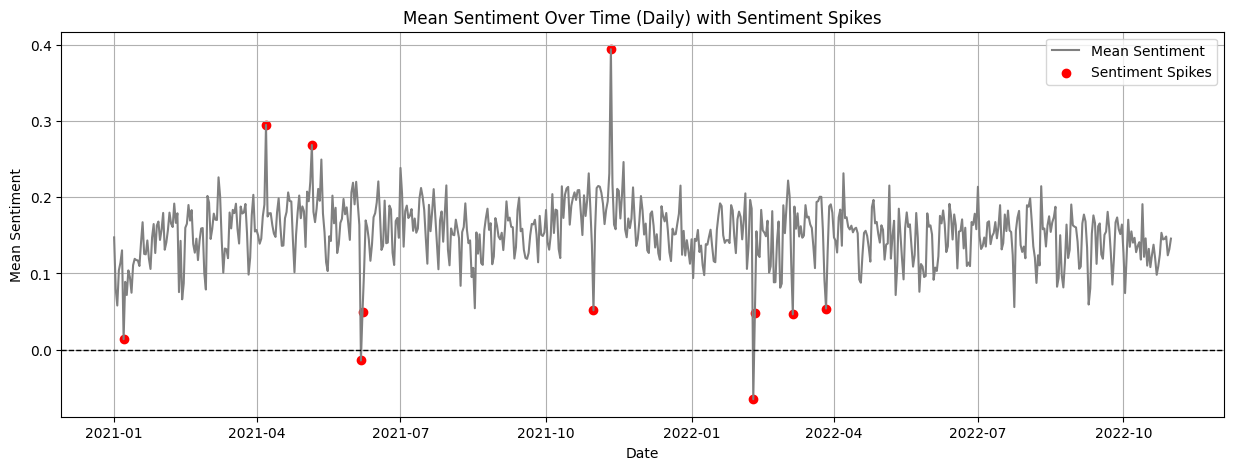

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df_subset = df.loc[:, ['Datetime', 'Sentiment']]

# Convert 'Datetime' to datetime type 
df_subset['Datetime'] = pd.to_datetime(df_subset['Datetime'])

# Resample the data to daily frequency and calculate the mean sentiment
df_daily_sentiment = df_subset.resample('D', on='Datetime').mean()

# Calculate Z-scores for the mean sentiment values
z_scores = stats.zscore(df_daily_sentiment['Sentiment'])

# Define a threshold for detecting sentiment spikes
threshold = 2.6

# Identify sentiment spikes based on the threshold
sentiment_spikes = df_daily_sentiment[abs(z_scores) > threshold]

# Sort sentiment spikes from highest to lowest sentiment
sentiment_spikes = sentiment_spikes.sort_values(by='Sentiment', ascending=False)

# Print the dates of the detected sentiment spikes
print("Sentiment Spikes Detected:")
for date in sentiment_spikes.index:
    print(f"Sentiment Spike detected on: {date.strftime('%Y-%m-%d')}")

# Plot the daily mean sentiment with spikes highlighted
plt.figure(figsize=(15, 5))
plt.plot(df_daily_sentiment.index, df_daily_sentiment['Sentiment'], label='Mean Sentiment', color='gray')
plt.scatter(sentiment_spikes.index, sentiment_spikes['Sentiment'], color='red', label='Sentiment Spikes')
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.title('Mean Sentiment Over Time (Daily) with Sentiment Spikes')
plt.grid(True)
plt.legend()
plt.show()


In [4]:

# Filter the original DataFrame to include only the rows corresponding to the detected sentiment spikes
spike_dates = sentiment_spikes.index.strftime('%Y-%m-%d')

spike_data_folder = r'D:\Research\Python\Data\WIP\Spike Data'
if not os.path.exists(spike_data_folder):
    os.makedirs(spike_data_folder)

for date in spike_dates:
    spike_data = df[df['Datetime'].dt.strftime('%Y-%m-%d') == date]
    
    # Save each filtered DataFrame as a separate CSV file
    filename = os.path.join(spike_data_folder, f'{date}_spike_data.csv')
    spike_data.to_csv(filename, index=False)

print("Spike data saved as separate CSV files.")


Spike data saved as separate CSV files.
